# Feature scaling , variables and distance between points
### * Created by Ramses Alexander Coraspe Valdez
### * Created on september 4, 2019

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [63]:
raw_data = {'x1': [0.15, -0.1, 0, -0.25, 0.05],
'x2': [3500, 3400, 4000, 3900, 3200],
'y': [8, 5, 3, 1, 7]}
df = pd.DataFrame(raw_data)
df


,x1,x2,y
0,0.15,3500,8
1,-0.10,3400,5
2,0.00,4000,3
3,-0.25,3900,1
4,0.05,3200,7


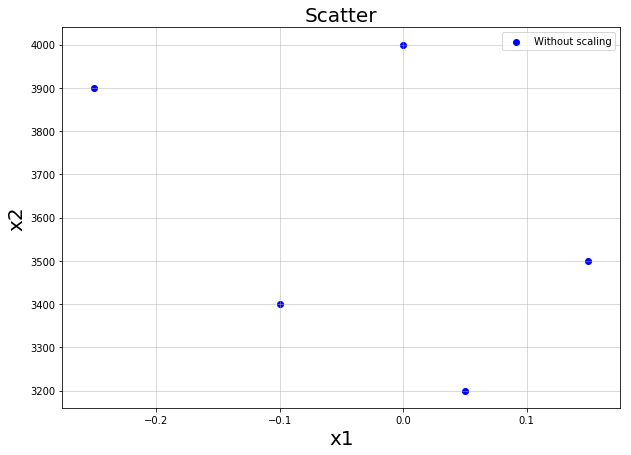

In [64]:
plt.figure(figsize=(10, 7))
plt.scatter(df.x1,df.x2, label="Without scaling", color='blue')

plt.grid(True, alpha=0.6)
plt.title("Scatter", fontsize=20)
plt.xlabel("x1", fontsize=20) 
plt.ylabel("x2", fontsize=20) 
plt.legend()
plt.show()

In [0]:
def stddev(c):   
    v = 0
    mn = round(sum(c),2)/len(c)    
    for i in range(len(c)):
        v += (c[i]-mn)**2
    v /= len(c)
    return math.sqrt(v)

# 1.a) Scaling by normalization

![texto alternativo](https://raw.githubusercontent.com/Wittline/Machine_Learning/master/Feature%20scaling/n.PNG)

In [0]:
def scalingByNormalization(c):
  newc = [None] * len(c)
  mean = round(sum(c),2)/len(c)
  sdev = stddev(c)  
  for i in range(len(c)):
    newc[i] = (c[i] - mean)/ sdev
    
  return newc      

In [0]:
nx1= scalingByNormalization(df.x1)
nx2= scalingByNormalization(df.x2)

# 1.b) Scaling by range

![texto alternativo](https://raw.githubusercontent.com/Wittline/Machine_Learning/master/Feature%20scaling/r.PNG)



In [0]:
def scalingByRange(c):
  newc = [None] * len(c)
  mean = round(sum(c),2)/len(c)
  r = max(c)- min(c)
  for i in range(len(c)):
    newc[i] = (c[i] - mean)/ r
    
  return newc

In [0]:
mx1= scalingByRange(df.x1)
mx2= scalingByRange(df.x2)

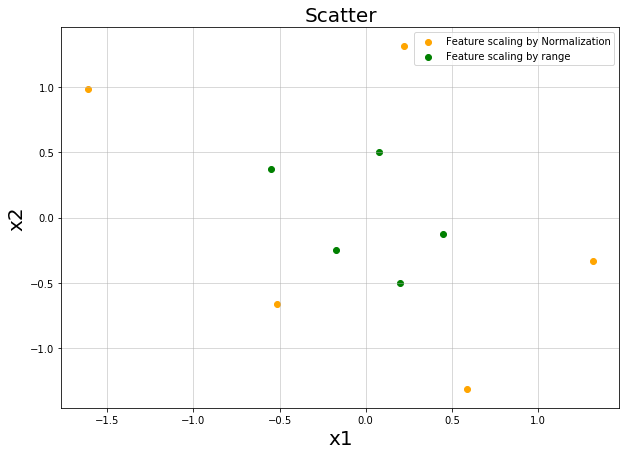

In [70]:
plt.figure(figsize=(10, 7))
plt.scatter( nx1, nx2 ,label="Feature scaling by Normalization", color='orange')
plt.scatter(mx1, mx2 ,label="Feature scaling by range", color='green')


plt.grid(True, alpha=0.6)
plt.title("Scatter", fontsize=20)
plt.xlabel("x1", fontsize=20) 
plt.ylabel("x2", fontsize=20) 
plt.legend()
plt.show()

# 1.c) Scaling between range

![texto alternativo](https://raw.githubusercontent.com/Wittline/Machine_Learning/master/Feature%20scaling/br.PNG)


In [0]:
def scalingBetweenRange(c, r1, r2):
  newc = [None] * len(c)
  
  for i in range(len(c)):    
    newc[i] = ((r2-r1)* ((c[i] - min(c))/(max(c)-min(c)))) + r1    
    
  return newc

In [0]:
ny= scalingBetweenRange(df.y,-10, 20)

In [73]:
df2 = pd.DataFrame(list(zip(nx1, nx2, mx1, mx2, ny)), 
               columns =['x1N', 'x2N', 'x1R', 'x2R', 'ny']) 
df2

,x1N,x2N,x1R,x2R,ny
0,1.319824,-0.329690,0.450,-0.125,20.000000
1,-0.513265,-0.659380,-0.175,-0.250,7.142857
2,0.219971,1.318761,0.075,0.500,-1.428571
3,-1.613118,0.989071,-0.550,0.375,-10.000000
4,0.586588,-1.318761,0.200,-0.500,15.714286


# 2.a) Euclidean distance

![texto alternativo](https://raw.githubusercontent.com/Wittline/Machine_Learning/master/Feature%20scaling/euc.PNG)



In [0]:
def euclidian(c1, c2):
	d=0
	for i in range(len(c1)):
		d += math.pow(c2[i] - c1[i], 2)
	return math.sqrt(d)

In [75]:
v1 = [2, 1]
v2 = [3, 4]
print(euclidian(v1, v2))

3.1622776601683795


# 2.b) Manhattan distance

![texto alternativo](https://raw.githubusercontent.com/Wittline/Machine_Learning/master/Feature%20scaling/man.PNG)


In [0]:
def manhattan(c1, c2):
	d=0
	for i in range(len(c1)):
		d += abs(c1[i] - c2[i])
	return d

In [77]:
v1 = [2, 3]
v2 = [1, 4]
print(manhattan(v1,v2))

2


# 2.c) Chebyshev distance

![texto alternativo](https://raw.githubusercontent.com/Wittline/Machine_Learning/master/Feature%20scaling/che.PNG)


In [0]:
def Chebyshev(c1, c2):  
  subtractions = [None] * len(c1)
  for i in range(len(c1)):
    subtractions[i] = abs(c2[i] - c1[i])
  
  return max(subtractions)

In [79]:
v1 = [2, 1]
v2 = [3, 4]
print(Chebyshev(v1, v2))

3


# 2.d) Minkowski distance

![texto alternativo](https://raw.githubusercontent.com/Wittline/Machine_Learning/master/Feature%20scaling/mi.PNG)

In [0]:
def Minkowski(c1,c2, p):
  pp = 1/p
  d=0
  for i in range(len(c1)):
    d +=  math.pow(abs(c1[i] - c2[i]),p)
         
  return math.pow(d, pp)     

In [81]:
v1 = [2, 1]
v2 = [3, 4]
print(Minkowski(v1,v2,0.7))


5.168695137549193


# 3. Suppose you want to apply the multiple linear regression method to a database whose variables or factors are shown in the image below. Let's also assume that at the moment only the following variables will be used to build the model:

* ### Independent variables: *season*, *hour*, *workingday*, *windspeed*
* ### Dependent variable: *registered*


![texto alternativo](https://raw.githubusercontent.com/Wittline/Machine_Learning/master/Feature%20scaling/detail.PNG)







### 3.a) Indicate what type of variable each one is: categorical or numerical. If it is numerical, so indicates whether it is discrete or continuous.


1.   Categorical: Season, workingday 
2.   Numerical: registered(discrete), hour(discrete), windspeed(continuous) 


### 3.b) In the case of categorical variables, indicate the *dummies* variables that you believe should be introduced to the model, indicating the *base case* of each of these dummy variables, or if you decided not to use *base case* and instead add a additional dummy variable. The *base case* is the variable that is considered in the model when all other dummy variables in that case are zero.


![texto alternativo](https://raw.githubusercontent.com/Wittline/Machine_Learning/master/Feature%20scaling/basecase.png)




### 3.c) How many dummy variables were added? It indicates how the symbolic representation of the multiple linear regression model would look like when all independent, dummy or non-dummy variables are included.



*  ### y= Bo + B1hour + B2workingday + B3windspeed + D1springer + D2fall + D3winter + E